# Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate
market. It includes various attributes such as property characteristics, location, sale prices,
and other relevant features. The goal is to perform data wrangling to gain insights into the
factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces,
special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available
(e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period,
property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or
label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average
sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('RealEstate_Prices.csv')
additional = pd.read_csv('additional_info.csv')
df.columns,additional.columns

(Index(['property id', 'property type', 'neighborhood', 'bedrooms', 'bathrooms',
        'area sq ft', 'year built', 'sale price', 'sale date'],
       dtype='object'),
 Index(['property id', 'distance to amenities mi', 'crime rate',
        'nearby schools', 'demographics population', 'nearby shopping centers',
        'property taxes', 'house condition'],
       dtype='object'))

In [18]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
additional.columns = [col.strip().replace(" ", "_").lower() for col in additional.columns]

In [19]:
df.columns,additional.columns

(Index(['property_id', 'property_type', 'neighborhood', 'bedrooms', 'bathrooms',
        'area_sq_ft', 'year_built', 'sale_price', 'sale_date'],
       dtype='object'),
 Index(['property_id', 'distance_to_amenities_mi', 'crime_rate',
        'nearby_schools', 'demographics_population', 'nearby_shopping_centers',
        'property_taxes', 'house_condition'],
       dtype='object'))

In [20]:
merged_df = pd.merge(df,additional,on='property_id',how='inner')

In [21]:
# checking for missing values
merged_df.isna().sum()

property_id                 0
property_type               0
neighborhood                0
bedrooms                    5
bathrooms                   0
area_sq_ft                  2
year_built                  0
sale_price                  5
sale_date                   0
distance_to_amenities_mi    0
crime_rate                  0
nearby_schools              0
demographics_population     3
nearby_shopping_centers     0
property_taxes              0
house_condition             3
dtype: int64

In [22]:
#Imputation
categorical_cols = ['bedrooms']
numerical_cols = ['area_sq_ft','sale_price','demographics_population']

for col in categorical_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

for col in numerical_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

In [23]:
merged_df.isna().sum()

property_id                 0
property_type               0
neighborhood                0
bedrooms                    0
bathrooms                   0
area_sq_ft                  0
year_built                  0
sale_price                  0
sale_date                   0
distance_to_amenities_mi    0
crime_rate                  0
nearby_schools              0
demographics_population     0
nearby_shopping_centers     0
property_taxes              0
house_condition             3
dtype: int64

In [24]:
#Removal
merged_df = merged_df.dropna()

In [25]:
merged_df.isna().sum()

property_id                 0
property_type               0
neighborhood                0
bedrooms                    0
bathrooms                   0
area_sq_ft                  0
year_built                  0
sale_price                  0
sale_date                   0
distance_to_amenities_mi    0
crime_rate                  0
nearby_schools              0
demographics_population     0
nearby_shopping_centers     0
property_taxes              0
house_condition             0
dtype: int64

In [26]:
#Filter and subset the data based on specific criteria, such as a particular time period, property type, or location.
filtered_df = merged_df[(merged_df["sale_date"] >= "2020-01-01") & (merged_df["property_type"] == "Apartment")]
filtered_df

,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
0,1001,Apartment,Downtown,3.0,2,1154.000000,2001,341218.0,29-09-2020,0.5,Low,3,50000.0,5,10000,Good
4,1005,Apartment,Downtown,2.0,1,976.000000,2013,297985.0,21-05-2022,0.8,Low,3,52000.0,4,3500,Good
17,1018,Apartment,Suburban,2.0,1,3602.916667,2022,180891.0,26-06-2021,1.0,Medium,2,48000.0,6,1800,Fair
34,1035,Apartment,Downtown,2.0,1,924.000000,2018,349800.0,30-12-2022,0.8,Low,3,52000.0,4,3500,Good
47,1048,Apartment,Suburban,2.0,1,714.000000,2016,180722.0,30-04-2021,1.0,Medium,2,48000.0,6,1800,Fair


In [27]:
#Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis.
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['property_type',
'neighborhood',
'crime_rate',
'house_condition']

enc = LabelEncoder()

for col in categorical_cols:
    merged_df[col] = enc.fit_transform(merged_df[col])

In [28]:
merged_df.head()

,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
0,1001,0,0,3.0,2,1154.0,2001,341218.000000,29-09-2020,0.5,1,3,50000.0,5,10000,2
1,1002,2,2,4.0,3,2553.0,2014,490564.000000,03-04-2021,1.2,2,4,60000.0,2,4000,0
2,1003,1,3,2.0,1,821.0,2008,488715.466667,15-04-2020,0.3,0,1,40000.0,8,2000,1
3,1004,2,2,5.0,4,3018.0,2004,560852.000000,25-08-2020,2.5,1,5,70000.0,3,5000,0
4,1005,0,0,2.0,1,976.0,2013,297985.000000,21-05-2022,0.8,1,3,52000.0,4,3500,2


In [29]:
#Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.
aggregated_df = merged_df.groupby("neighborhood").agg({"sale_price": "mean"})
aggregated_df

,sale_price
neighborhood,
0,317621.200000
1,569359.500000
2,412905.473684
3,886419.985185


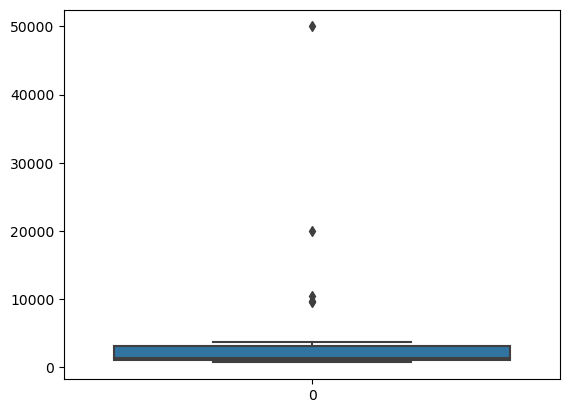

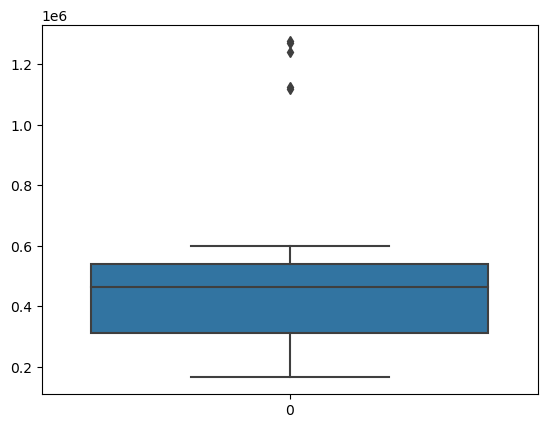

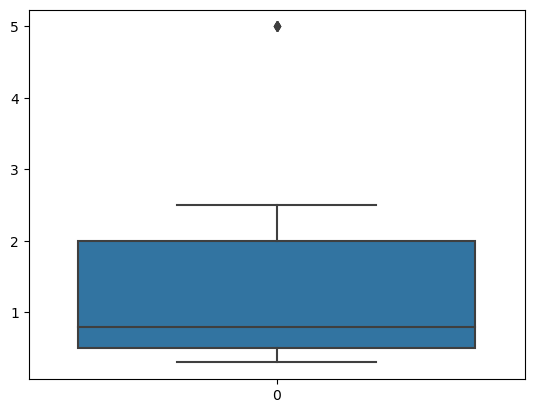

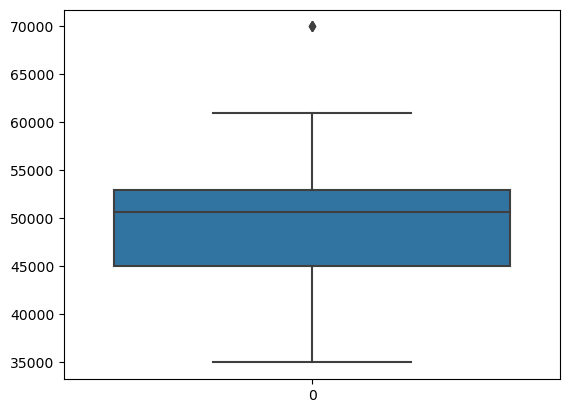

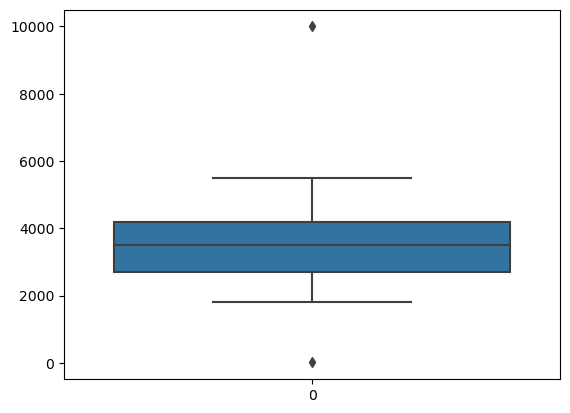

In [30]:
#Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process.
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
'area_sq_ft',
'sale_price',
'distance_to_amenities_mi',
'demographics_population',
'property_taxes'
]

for col in cols:
    sns.boxplot(merged_df[col])
    plt.show()

In [31]:
merged_df[(merged_df["sale_price"] > 3 * merged_df["sale_price"].std()) | (merged_df["sale_price"] < -3 * merged_df["sale_price"].std())]

,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
5,1006,1,3,3.0,2,1399.0,2020,1117439.0,09-05-2020,0.6,0,2,45000.0,7,3200,2
15,1016,1,3,3.0,2,1365.0,2021,1124017.0,29-08-2020,0.6,0,2,45000.0,7,3200,2
25,1026,1,3,3.0,2,1452.0,2013,1268442.0,08-03-2021,0.6,0,2,45000.0,7,3200,2
35,1036,1,3,3.0,2,1390.0,2019,1274015.0,02-08-2020,0.6,0,2,45000.0,7,3200,2
45,1046,1,3,3.0,2,20003.0,2020,1239005.0,07-11-2021,0.6,0,2,45000.0,7,3200,2
